# Playing with Eric Jonas Dataset

In [1]:
import pickle
import netdataio
import graph_conv_many_nuc_util
import torch
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools

In [263]:
filename = 'graph_conv_many_nuc_pipeline.datasets/graph_conv_many_nuc_pipeline.data.13C.nmrshiftdb_hconfspcl_nmrshiftdb.aromatic.64.0.mol_dict.pickle'
data = pickle.load(open(filename, 'rb'))

In [4]:
hparams = graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

In [5]:
graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

{'feat_vect_args': {'feat_atomicno_onehot': [1, 6, 7, 8, 9, 15, 16, 17],
  'feat_pos': False,
  'feat_atomicno': True,
  'feat_valence': True,
  'aromatic': True,
  'hybridization': True,
  'partial_charge': False,
  'formal_charge': True,
  'r_covalent': False,
  'total_valence_onehot': True,
  'r_vanderwals': False,
  'default_valence': True,
  'rings': True},
 'feat_mat_args': {'feat_distances': False, 'feat_r_pow': None},
 'adj_args': {'edge_weighted': False,
  'norm_adj': True,
  'add_identity': True,
  'split_weights': [1, 1.5, 2, 3]}}

In [6]:
d['train_df']

,molecule_id,rdmol,spectra_ids,value
0,4001,<rdkit.Chem.rdchem.Mol object at 0x1a2e6b81f0>,[1],"[{15: 193.4, 11: 203.0, 2: 33.5, 14: 33.5, 1: ..."
2,4003,<rdkit.Chem.rdchem.Mol object at 0x1a2e6b8270>,[3],"[{10: 26.1, 9: 23.3, 6: 23.5, 1: 132.1, 8: 23...."
3,4004,<rdkit.Chem.rdchem.Mol object at 0x1a2e6b84b0>,[4],"[{4: 38.7, 8: 38.7, 6: 73.5, 15: 25.2, 11: 18...."
4,4006,<rdkit.Chem.rdchem.Mol object at 0x1a2e6b8530>,[6],"[{8: 120.9, 5: 146.0, 2: 109.4, 4: 159.8, 15: ..."
6,4009,<rdkit.Chem.rdchem.Mol object at 0x1a2e6b8770>,[9],"[{26: 62.8, 22: 78.44, 0: 95.68, 1: 96.13, 7: ..."
...,...,...,...,...
26908,44689,<rdkit.Chem.rdchem.Mol object at 0x1a2e9e7af0>,[49498],"[{2: 70.9, 16: 73.8, 13: 27.8, 14: 120.5, 10: ..."
26909,44692,<rdkit.Chem.rdchem.Mol object at 0x1a2e9e7b70>,[49504],"[{0: 98.2, 10: 134.0, 6: 145.3, 9: 120.6, 11: ..."
26910,44693,<rdkit.Chem.rdchem.Mol object at 0x1a2e9e7bf0>,[49505],"[{13: 24.5, 8: 51.8, 17: 148.7, 11: 69.5, 19: ..."
26911,44695,<rdkit.Chem.rdchem.Mol object at 0x1a2e9e7c70>,[49508],"[{17: 23.1, 6: 75.2, 16: 176.4, 1: 47.6, 14: 7..."


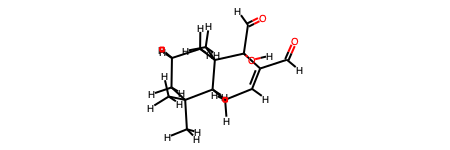

In [265]:
data['train_df']['rdmol'][0]

In [21]:
mols_dict = {}
for i in d['train_df']['rdmol']:
    if i not in mols_dict:
        mols_dict[i] = 1
    else:
        mols_dict[i] += 1

In [43]:
mols_dict_ordered = {k: v for k, v in sorted(mols_dict.items(), key=lambda item: item[1], reverse = False)}

In [44]:
mols_count = {}
for i in mols_dict_ordered:
    if mols_dict_ordered[i] not in mols_count:
        mols_count[mols_dict_ordered[i]]=1
    else: 
        mols_count[mols_dict_ordered[i]]+=1

In [45]:
mols_count

{1: 19071, 2: 974, 3: 140, 4: 17, 5: 2, 6: 1}

In [32]:
mols_count.keys()

dict_keys([6, 5, 4, 3, 2, 1])

In [34]:
mols_count.values()

dict_values([1, 2, 17, 140, 974, 19071])

### Distribution of dupilcates per molecule

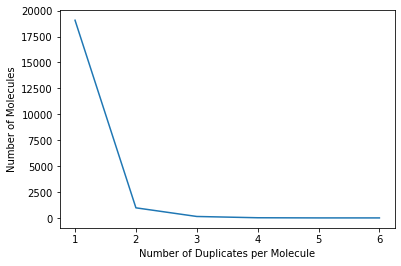

In [46]:
import matplotlib.pyplot as plt
x, y = list(mols_count.keys()), list(mols_count.values())
plt.plot(x,y)
plt.xlabel('Number of Duplicates per Molecule')
plt.ylabel('Number of Molecules')
plt.show()

In [7]:
bonds = []
for i in d['train_df']['rdmol']:
    bonds.append(i.GetNumBonds())

In [9]:
max(bonds)*2

140

In [208]:
d['train_df']['value'][0]

[{15: 193.4,
  11: 203.0,
  2: 33.5,
  14: 33.5,
  1: 41.8,
  6: 26.5,
  10: 17.6,
  8: 140.99,
  0: 18.3,
  4: 42.0,
  7: 158.3,
  12: 22.6,
  5: 31.7,
  3: 42.2,
  9: 78.34}]

In [9]:
d['MAX_N']

64

In [10]:
d['spectra_config']

[('13C', 'dataset.named/spectra.nmrshiftdb_13C.feather')]

In [11]:
d['tgt_nucs']

['13C']

In [12]:
train_df = d['train_df']
tgt_nucs = d['tgt_nucs']
test_df = d['test_df'] #.sample(10000, random_state=10)

In [13]:
MAX_N = d['MAX_N']

datasets = {}

for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

### Looking at adjacency matrices

In [219]:
len(datasets['train'][0])

5

In [222]:
adj = datasets['train'][0][0]

In [225]:
adj[0]

tensor([[0.2000, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [226]:
adj[1]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [227]:
adj[2]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [229]:
print(adj[3])

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [231]:
torch.set_printoptions(profile="full")
print(adj[3][0])
torch.set_printoptions(profile="default")

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [237]:
for i in range(len(adj[0])):
    for j in range(len(adj[0][i])):
        if j != i and adj[0][i][j] != 0:
            print(adj[0][i], i)

tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 0
tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.000

In [19]:
for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

In [20]:
datasets['train']

In [25]:
len(datasets['test'])

5390

In [21]:
dl_train = torch.utils.data.DataLoader(datasets['train'], batch_size=16, 
                                           shuffle=True,pin_memory=True)

In [70]:
dl_train

In [73]:
dataiter = iter(dl_train)
data = dataiter.next()

In [74]:
len(data)

5

In [75]:
data[0]

tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.2500, 0.2500, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0

In [76]:
data[1]

tensor([[[6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

# Playing around with original dataset

In [261]:
suppl2 = Chem.SDMolSupplier('nmrshiftdb2withsignals.sd', removeHs=False)

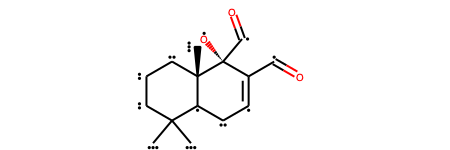

In [271]:
suppl2[0]

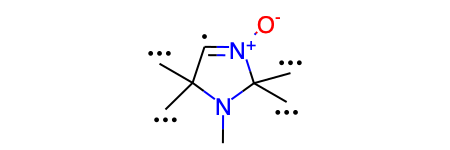

In [458]:
suppl2[2]

In [2]:
from rdkit.Chem import PandasTools
df = PandasTools.LoadSDF('nmrshiftdb2withsignals.sd',smilesName='SMILES',molColName='Molecule',
                         includeFingerprints=True)

RDKit WARNING: [14:10:45] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [14:10:45] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 27 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 27 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 31 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 30 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 30 ignored.
RDKit WARNING: [14:10:46] Warning: conflicting stereochemistry at atom 31 ignored.
RDKit WARNING: [14:10:47] Warning: conflicting stereochemistry at atom 13 ignored.
RDKit WARNING: [14:10:47] Warning: conflicting stereochemistry at atom 13 ignored.
RDKit WARNING: [14:10:47] Warning: conflicting stereochemistry at atom 28 ignored.
RDKit WARNING: [14:10:47] Warning: conflicting stereochemistry at atom 28 ignored.
RDKit 

RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 2 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 1 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 1 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 2 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 1 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 2 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 2 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [

RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 6 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 8 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 0 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 8 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 1 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 3 ignored.
RDKit WARNING: [14:11:44] Warning: conflicting stereochemistry at atom 2 ignored.
RDKit WARNING: [

In [185]:
df0 = df.copy()
df0 = df0[['Temperature [K]','nmrshiftdb2 ID','Field Strength [MHz]','Spectrum 13C 0','Spectrum 13C 1','Spectrum 13C 2','Spectrum 13C 3','Solvent','ID','SMILES','Molecule']]

In [338]:
l = []
for index, row in df1.iterrows():
    cnt = 0
    for atom_index, atom in enumerate(row['Molecule'].GetAtoms()):
        if atom.GetAtomicNum() not in [1,6,7,8,9,15,16,17]:
            cnt += 1
    if cnt == 0:
        l.append(0)
    else:
        l.append(1)

In [340]:
df0['Bad Atoms'] = l

In [341]:
for index, row in df0.iterrows():
    if (row['Molecule'].GetNumAtoms() > 64) or (row['Bad Atoms'] == 1):
        df0.drop(index, inplace = True)

In [342]:
df0.drop('Bad Atoms', axis = 1, inplace = True)

In [344]:
len(df0)

36966

In [400]:
len(df0)

28048

In [401]:
d = {}
for index, row in df0.iterrows():
    if row['Molecule'].GetNumAtoms() in d:
        d[row['Molecule'].GetNumAtoms()]+=1
    else:
        d[row['Molecule'].GetNumAtoms()]=1

In [402]:
x, y = list(d.keys()), list(d.values())

<BarContainer object of 64 artists>

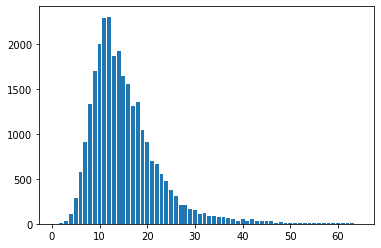

In [403]:
plt.bar(x,y)

In [404]:
smiles = df0.SMILES.tolist()
temp = df0['Temperature [K]'].tolist()
field_strength = df0['Field Strength [MHz]'].tolist()
C_spectra = df0['Spectrum 13C 0'].tolist()
solvent = df0.Solvent.tolist()
nmr_id = df0['nmrshiftdb2 ID'].tolist()

len(smiles), len(temp), len(field_strength), len(C_spectra), len(solvent), len(nmr_id)

(28048, 28048, 28048, 28048, 28048, 28048)

In [405]:
nmr_dict = {}
for i in range(len(smiles)):
    if smiles[i] not in nmr_dict:
        nmr_dict[smiles[i]] = [[nmr_id[i]],[temp[i]],[solvent[i]],[field_strength[i]],[C_spectra[i]]]
    else:
        nmr_dict[smiles[i]][0].append(nmr_id[i])
        nmr_dict[smiles[i]][1].append(temp[i])
        nmr_dict[smiles[i]][2].append(solvent[i])
        nmr_dict[smiles[i]][3].append(field_strength[i])
        nmr_dict[smiles[i]][4].append(C_spectra[i])

In [406]:
len(nmr_dict)

27864

In [407]:
nmr_count_dict = {}
for i in range(len(smiles)):
    if smiles[i] not in nmr_count_dict:
        nmr_count_dict[smiles[i]] = 1
    else:
        nmr_count_dict[smiles[i]] += 1

In [408]:
nmr_mols_count = {}
for i in nmr_count_dict:
    if nmr_count_dict[i] not in nmr_mols_count:
        nmr_mols_count[nmr_count_dict[i]]=1
    else: 
        nmr_mols_count[nmr_count_dict[i]]+=1

In [409]:
nmr_mols_count

{1: 27686, 2: 173, 3: 4, 4: 1}

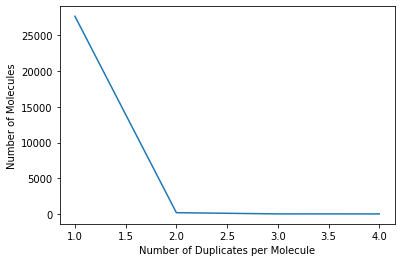

In [410]:
import matplotlib.pyplot as plt
x, y = list(nmr_mols_count.keys()), list(nmr_mols_count.values())
plt.plot(x,y)
plt.xlabel('Number of Duplicates per Molecule')
plt.ylabel('Number of Molecules')
plt.show()

In [330]:
df0 = df.copy()
df0 = df0[['Temperature [K]','nmrshiftdb2 ID','Field Strength [MHz]','Spectrum 13C 0','Spectrum 13C 1','Spectrum 13C 2','Spectrum 13C 3','Solvent','ID','SMILES','Molecule']]

In [321]:
def spectrum_to_target(l, dataframe, names):
    for spec, target in zip(l, names):
        new = df0[spec].str.split("|").tolist()
        
        n = []
        for l in new:
            inner = []
            if type(l) == list:
                for i in l:
                    if i != '':
                        j = i.split(';')
                        inner.append(j)
                n.append(inner)
            else:
                n.append(None)

        m = []
        for i in n:
            if type(i) == list:
                d = {}
                for j in i:
                    d[j[2]] = j[0]#int(d[j[2]]) = float(j[0])
                temp_d = {int(k): float(v) for k, v in d.items()}
                d_ordered = {int(k): float(v) for k, v in sorted(temp_d.items(), key=lambda item: item[0], reverse = False)}
                m.append(d_ordered)
            else:
                m.append(None)
        dataframe[target] = m

In [322]:
def temps_to_tempval(dataframe):
    new = dataframe['Temperature [K]'].str.split(" ").tolist()

    for index, value in enumerate(new):
        if value == ['0:', '293.15', '1:Unreported', '']:
            new[index] = ['0:293.15', '1:Unreported', '']

    n = []
    for i in new:
        inner = []
        if type(i) != float:
            for j in i:
                if j != '':
                    inner.append(j.split(":"))
            n.append(inner)
        else:
            n.append(None)

    m = []
    for i in n:
        if type(i) == list:
            inner = []
            for j in i:
                inner.append(j[1])
            m.append(inner)
        else:
            m.append(None)

    for i in m:
        if type(i) == list:
            for j in range(4-len(i)):
                i.append(None)

    for index, value in enumerate(m):
        if value == None:
            m[index] = [None,None,None,None]
        if len(m[index]) > 4:
            m[index] = m[index][:4]

    col = np.array(m)[:,0]
    dataframe['Temp1'] = col

In [323]:
def solvents_processing(dataframe):
    s = []
    for i in dataframe['Solvent'].tolist():
        if type(i) != float:
            s.append('{'+i+'}')
        else:
            s.append(None)

    solvents_list = []
    for string in s:
        d = {}
        l_start = []
        l_end = []
        if type(string) == str:
            for i in range(len(string)):
                if (string[i] == ':') and (string[i-1].isdigit() == True) and (string[i+1].isdigit() == False):
                    l_start.append(i+1)
                    l_end.append(i-2)
            l_end.append(len(string)-2)
            for i in range(len(l_start)):
                d[i] = string[l_start[i]:l_end[i+1]]
        #         print(string[l_start[i]:l_end[i+1]])
        else:
            d = {0: 'Unreported'}
        solvents_list.append(d)

    first_solvents = [i[0] for i in solvents_list]
    second_solvents = []
    for i in solvents_list:
        if len(i) > 1:
            second_solvents.append(i[1])
        else:
            second_solvents.append('Unreported')
    dataframe['Solvent1'] = first_solvents
    dataframe['Solvent2'] = second_solvents

In [331]:
temps_to_tempval(df0)

In [332]:
solvents_processing(df0)

In [333]:
spectrum_to_target(['Spectrum 13C 0', 'Spectrum 13C 1', 'Spectrum 13C 2', 'Spectrum 13C 3'], df0, ['target1', 'target2', 'target3', 'target4'])

In [334]:
temp = df0[['nmrshiftdb2 ID', 'SMILES', 'Solvent1', 'Temp1', 'Molecule', 'target1']]

In [335]:
df_final = temp[temp['target1'].isnull() == False]

,nmrshiftdb2 ID,SMILES,Solvent1,Temp1,Molecule,target1
0,234,[C]C1([C])[C][C][C][C@@]2([C])[C]1[C][C]=C([C]...,Chloroform-D1 (CDCl3),298,,"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ..."

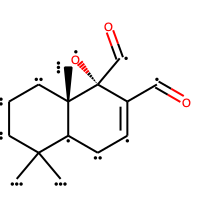

In [336]:
df_final.head(1)

In [341]:
df_final.groupby('Solvent1').count().sort_values(by=['nmrshiftdb2 ID'], ascending = False).head().reset_index()

,Solvent1,nmrshiftdb2 ID,SMILES,Temp1,Molecule,target1,target1_str
0,Unreported,29154,29154,29120,29154,29154,29154
1,Chloroform-D1 (CDCl3),2158,2158,2158,2158,2158,2158
2,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",402,402,402,402,402,402
3,Methanol-D4 (CD3OD),331,331,331,331,331,331
4,Acetone-D6 ((CD3)2CO),156,156,156,156,156,156


In [338]:
targstr = [str(i) for i in df_final['target1'].tolist()]

In [340]:
df_final['target1_str'] = targstr

/Users/aquail/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### There seems to be a difference between the currently available dataset and the dataset Eric Jonas/Seokhang used?

#### I am not properly processing H's - will just join with Seokhang dataset to include solvent data

In [342]:
message_data = pickle.load(open('../nmr_mpnn-master/datasets/data_13C.pickle', 'rb'))

In [366]:
type(message_data)

dict

In [367]:
message_data.keys()

dict_keys(['train_df', 'test_df', 'MAX_N', 'spectra_config', 'tgt_nucs'])

In [369]:
message_data['spectra_config']

[('13C', 'dataset.named/spectra.nmrshiftdb_13C.feather')]

In [343]:
seok_train_df = message_data['train_df']

,molecule_id,rdmol,spectra_ids,value
0,4001,,[1],"[{15: 193.4, 11: 203.0, 2: 33.5, 14: 33.5, 1: ..."
2,4003,,[3],"[{10: 26.1, 9: 23.3, 6: 23.5, 1: 132.1, 8: 23...."
3,4004,,[4],"[{4: 38.7, 8: 38.7, 6: 73.5, 15: 25.2, 11: 18...."
4,4006,,[6],"[{8: 120.9, 5: 146.0, 2: 109.4, 4: 159.8, 15: ..."
6,4009,,[9],"[{26: 62.8, 22: 78.44, 0: 95.68, 1: 96.13, 7: ..."
...,...,...,...,...
26908,44689,,[49498],"[{2: 70.9, 16: 73.8, 13: 27.8, 14: 120.5, 10: ..."
26909,44692,,[49504],"[{0: 98.2, 10: 134.0, 6: 145.3, 9: 120.6, 11: ..."
26910,44693,,[49505],"[{13: 24.5, 8: 51.8, 17: 148.7, 11: 69.5, 19: ..."
26911,44695,,[49508],"[{17: 23.1, 6: 75.2, 16: 176.4, 1: 47.6, 14: 7..."

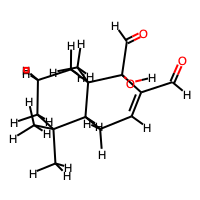
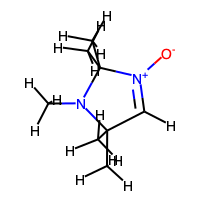
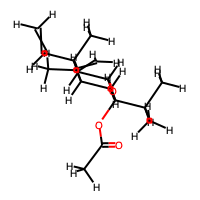
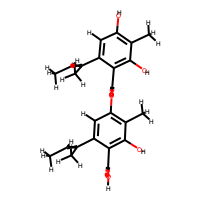
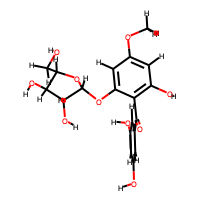
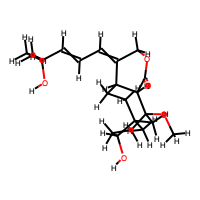
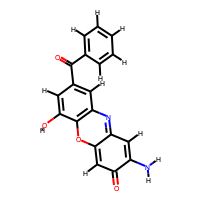
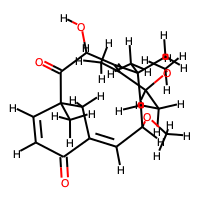
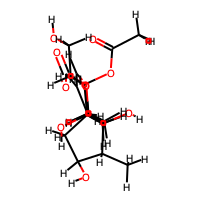
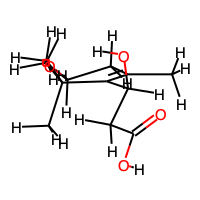

In [344]:
seok_train_df

In [345]:
new_target = [{k: v for k, v in sorted(d[0].items(), key=lambda item: item[0], reverse = False)} for d in seok_train_df['value']]

In [346]:
seok_train_df.drop('value', axis = 1, inplace = True)
seok_train_df['value'] = new_target

,molecule_id,rdmol,spectra_ids,value
0,4001,,[1],"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ..."

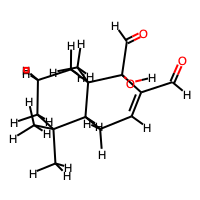

In [347]:
seok_train_df.head(1)

In [348]:
valuestr = [str(i) for i in seok_train_df['value'].tolist()]

In [349]:
seok_train_df['value_str'] = valuestr

,molecule_id,rdmol,spectra_ids,value,value_str
0,4001,,[1],"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ...","{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ..."

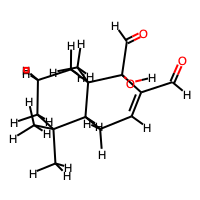

In [350]:
seok_train_df.head(1)

In [351]:
merged_df = seok_train_df.merge(df_final, how = 'inner', left_on='value_str', right_on='target1_str')

In [352]:
merged_df.groupby('Solvent1').count().sort_values(by=['nmrshiftdb2 ID'], ascending = False).head().reset_index()

,Solvent1,molecule_id,rdmol,spectra_ids,value,value_str,nmrshiftdb2 ID,SMILES,Temp1,Molecule,target1,target1_str
0,Unreported,18404,18404,18404,18404,18404,18404,18404,18404,18404,18404,18404
1,Chloroform-D1 (CDCl3),1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179
2,"Dimethylsulphoxide-D6 (DMSO-D6, C2D6SO)",241,241,241,241,241,241,241,241,241,241,241
3,Methanol-D4 (CD3OD),146,146,146,146,146,146,146,146,146,146,146
4,Acetone-D6 ((CD3)2CO),88,88,88,88,88,88,88,88,88,88,88


In [353]:
len(merged_df)

20301

In [355]:
merged_df_final = merged_df[['molecule_id', 'rdmol', 'Solvent1', 'Temp1', 'value']]

,molecule_id,rdmol,Solvent1,Temp1,value
0,4001,,Chloroform-D1 (CDCl3),298,"{0: 18.3, 1: 41.8, 2: 33.5, 3: 42.2, 4: 42.0, ..."

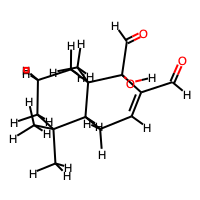

In [356]:
merged_df_final.head(1)

In [252]:
g = merged_df_final.groupby('SMILES').count().sort_values(by=['molecule_id'], ascending = False).reset_index()

,molecule_id_x,rdmol_x,Solvent1_x,Temp1_x,value_x,SMILES,molecule_id_y,rdmol_y,Solvent1_y,Temp1_y,value_y
0,4028,,Methanol-D4/D2O (CD3OD/D4),298,"{0: 156.4, 1: 96.4, 2: 155.1, 3: 134.7, 4: 155...",[C]Oc1[c]c(O[C@]2O[C@]([C][O])[C@@]([O])[C@]([...,2,2,2,2,2
1,6367,,Unreported,Unreported,"{0: 132.5, 1: 153.3, 2: 94.4, 3: 154.0, 4: 94....",[C]Oc1[c]c(O[C@]2O[C@]([C][O])[C@@]([O])[C@]([...,2,2,2,2,2
2,4045,,Acetone-D6 ((CD3)2CO),298,"{0: 142.1, 1: 129.1, 2: 128.6, 3: 128.4, 4: 12...",[O]C1=[C]c2[c]oc(=O)c3[c][c]c(-c4[c][c][c][c][...,2,2,2,2,2
3,4045,,Acetone-D6 ((CD3)2CO),298,"{0: 142.1, 1: 129.1, 2: 128.6, 3: 128.4, 4: 12...",[O]C1=[C]c2[c]oc(=O)c3[c][c]c(-c4[c][c][c][c][...,2,2,2,2,2
4,4059,,Chloroform-D1 (CDCl3),298,"{0: 132.5, 1: 134.4, 2: 39.7, 3: 144.8, 4: 143...",[C]1[C]c2[c][c][c][c]c2[C]1c1[c][c]c2c([c]1)[C...,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
389,44520,,Unreported,Unreported,"{0: 36.3, 1: 73.5, 2: 51.0, 3: 39.4, 4: 30.1, ...",[O][C]1[C][C][C@@H]2[C][C]3O[C]3[C@H]12,2,2,2,2,2
390,44554,,Unreported,Unreported,"{0: 29.5, 1: 32.9, 2: 96.7, 3: 174.7, 4: 29.0,...",[C][C]1[C][C@@H]2[C][C][C]C([O])=C2C(=O)O1,2,2,2,2,2
391,44555,,Unreported,Unreported,"{0: 29.0, 1: 27.5, 2: 96.8, 3: 174.9, 4: 29.5,...",[C][C]1[C][C@@H]2[C][C][C]C([O])=C2C(=O)O1,2,2,2,2,2
392,44582,,Unreported,Unreported,"{0: 27.4, 1: 21.4, 2: 21.4, 3: 24.6, 4: 36.1, ...",[O][C]1[C][C][C@@H]2[C][C][C][C][C@H]12,2,2,2,2,2

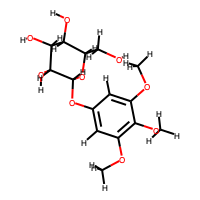
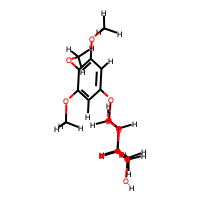
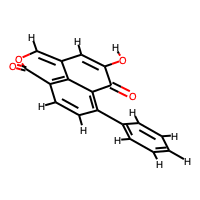
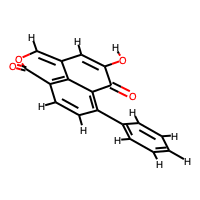
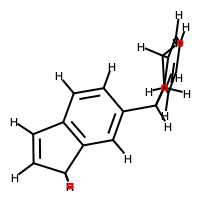
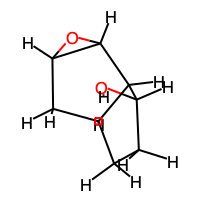
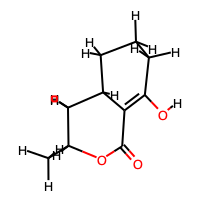
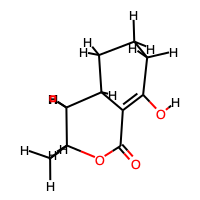
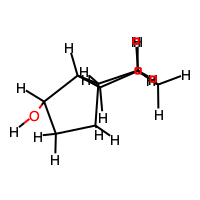
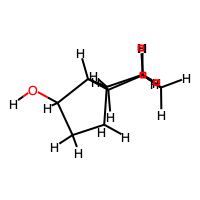

In [253]:
merged_df_final.merge(g[g['value']>1], how = 'inner', on = 'SMILES')

In [254]:
len(g[g['value']==1])

19907

In [255]:
g2 = merged_df_final.groupby('molecule_id').count().sort_values(by=['value'], ascending = False).reset_index()

In [256]:
g2.head()

,molecule_id,rdmol,Solvent1,Temp1,value,SMILES
0,4294,3,3,3,3,3
1,7834,2,2,2,2,2
2,4325,2,2,2,2,2
3,7246,2,2,2,2,2
4,4617,2,2,2,2,2


In [259]:
g2.drop_duplicates(keep = 'first', inplace = True)